# Linear Models

## Imports

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from yellowbrick.regressor import prediction_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

## Utils

In [3]:
def linear_regression_fit(model, x_train, y_train, x_test, y_test, show_predicted_error=True, get_coef=False):
    st = time.time()
    model.fit(x_train, y_train.squeeze())
    print('Training Time:', round(time.time() - st, 3))
    params = model.get_params()
    score = model.score(x_test, y_test.squeeze())
    coef = model.coef_ if get_coef else None
    if show_predicted_error:
        plt.figure(figsize=(5,5))
        prediction_error(model, x_test, y_test.squeeze(), is_fitted=True)
        plt.show()
    cross_value = cross_val_score(model, x_test, y_test.squeeze())
    return score, coef, params, cross_value

## Main

In [4]:
df = pd.read_csv('../../Data/international_matches_clean.csv')
df.head()

,away_team_continent,away_team_fifa_rank,away_team_goalkeeper_score,away_team_mean_defense_score,away_team_mean_midfield_score,away_team_mean_offense_score,away_team_total_fifa_points,home_team_continent,home_team_fifa_rank,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_midfield_score,home_team_mean_offense_score,home_team_total_fifa_points,shoot_out,result
0,0.4,0.349206,0.729167,0.651652,0.706897,0.600601,0.0,0.4,0.011628,0.937500,0.842262,0.898352,0.906801,0.0,0.0,0.0
1,0.4,0.031746,0.812500,0.960961,0.977011,0.870871,0.0,0.4,0.517442,0.708333,0.535714,0.472527,0.496222,0.0,0.0,0.0
2,0.4,0.396825,0.520833,0.399399,0.373563,0.480480,0.0,0.4,0.139535,0.583333,0.663690,0.609890,0.639798,0.0,0.0,3.0
3,0.4,0.211640,0.604167,0.360360,0.612069,0.600601,0.0,0.4,0.459302,0.604167,0.315476,0.340659,0.596977,0.0,0.0,-2.0
4,0.4,0.195767,0.625000,0.621622,0.626437,0.648649,0.0,0.4,0.046512,1.000000,1.000000,0.843407,0.982368,0.0,0.0,1.0


In [5]:
X = df[df.columns.difference(['result'])]
y = df[['result']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Linear Regression

Training Time: 0.018


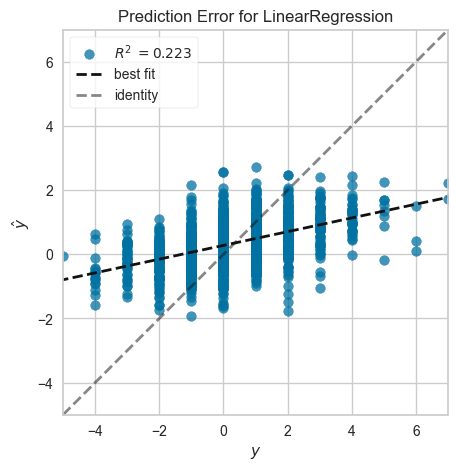

Score R^2: 0.223
Validación Cruzada: [0.25609482 0.1231758  0.25783003 0.16857474 0.27594974] 0.216


In [7]:
lr_score, lr_coef, lr_params, lr_cross = linear_regression_fit(LinearRegression(), X_train, y_train, X_test, y_test)
print('Score R^2:', round(lr_score, 3))
print('Validación Cruzada:', lr_cross, round(np.mean(lr_cross), 3))

## Ridge

Training Time: 0.005


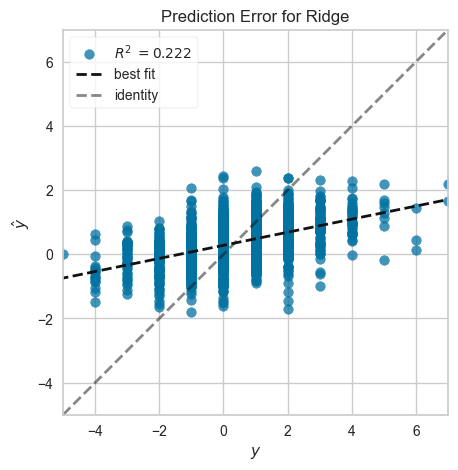

Score R^2: 0.222
Validación Cruzada: [0.2498292  0.1306764  0.2507843  0.17447786 0.28108798] 0.217


In [8]:
rd_score, rd_coef, rd_params, rd_cross = linear_regression_fit(Ridge(alpha=10.0), X_train, y_train, X_test, y_test)
print('Score R^2:', round(rd_score, 3))
print('Validación Cruzada:', rd_cross, round(np.mean(rd_cross), 3))

## KNeighborsRegressor

Training Time: 0.007


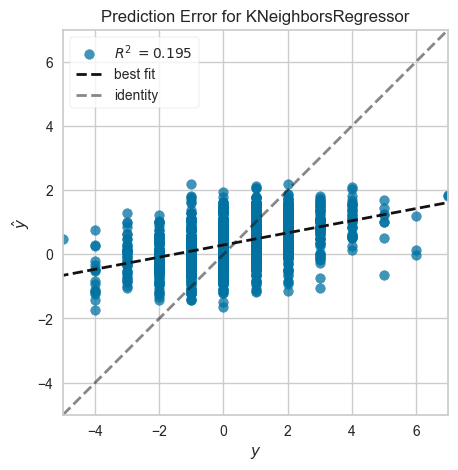

Score R^2: 0.195
Validación Cruzada: [0.23137501 0.13387569 0.21036481 0.14652612 0.25953019] 0.196


In [9]:
kn_score, kn_coef, kn_params, kn_cross = linear_regression_fit(KNeighborsRegressor(n_neighbors=28), X_train, y_train, X_test, y_test, get_coef=False)
print('Score R^2:', round(kn_score, 3))
print('Validación Cruzada:', kn_cross, round(np.mean(kn_cross), 3))

In [ ]:
x = range(2, 800, 2)
y1 = []
y2 = []
for i in x:
    kn_score, kn_coef, kn_params, kn_cross = linear_regression_fit(KNeighborsRegressor(n_neighbors=i), X_train, y_train, X_test, y_test, get_coef=False, show_predicted_error=False)
    y1.append(kn_score)
    y2.append(np.mean(kn_cross))

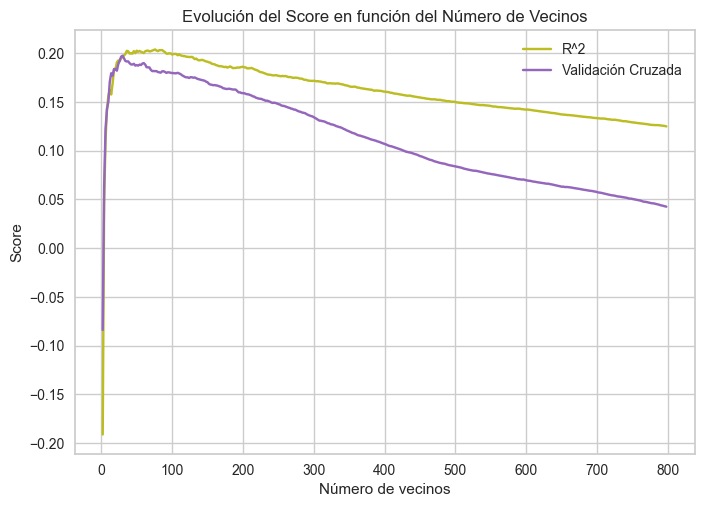

In [11]:
plt.plot(x, y1, c='tab:olive', label='R^2')
plt.plot(x, y2, c='tab:purple', label='Validación Cruzada')
plt.legend()
plt.xlabel('Número de vecinos')
plt.title('Evolución del Score en función del Número de Vecinos')
plt.ylabel('Score')
plt.show()